In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras import layers
from keras.models import Sequential


In [23]:
dataset_train = pd.read_csv('trainset.csv')
dataset_train.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [24]:
dataset_train.head()
train_set = dataset_train.iloc[:,1:2].values
type(train_set)
train_set.shape

(1259, 1)

In [25]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(train_set)

training_set_scaled.shape

(1259, 1)

In [26]:
X_train_array = []
y_train_array = []
for i in range(60, 1259):
  X_train_array.append(training_set_scaled[i-60:i,0])
  y_train_array.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train_array), np.array(y_train_array)
X_train1 = X_train.reshape((X_train.shape[0], X_train.shape[1],1))


In [27]:
X_train.shape

(1199, 60)

In [28]:
length = 60
n_features = 1

In [29]:
model = Sequential()
model.add(layers.SimpleRNN(45,input_shape=(length,n_features)))
model.add(layers.Dense(1))

In [30]:
model.compile(optimizer='adam', loss='mse')

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 45)                2115      
                                                                 
 dense_1 (Dense)             (None, 1)                 46        
                                                                 
Total params: 2161 (8.44 KB)
Trainable params: 2161 (8.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model.fit(X_train1,y_train,epochs=90, batch_size=50)

Epoch 1/90
24/24 [==============================] - 2s 18ms/step - loss: 0.0040
Epoch 2/90
24/24 [==============================] - 0s 19ms/step - loss: 7.4280e-04
Epoch 3/90
24/24 [==============================] - 0s 19ms/step - loss: 6.3285e-04
Epoch 4/90
24/24 [==============================] - 0s 18ms/step - loss: 6.5056e-04
Epoch 5/90
24/24 [==============================] - 0s 14ms/step - loss: 5.1202e-04
Epoch 6/90
24/24 [==============================] - 0s 11ms/step - loss: 4.2255e-04
Epoch 7/90
24/24 [==============================] - 0s 12ms/step - loss: 3.9516e-04
Epoch 8/90
24/24 [==============================] - 0s 12ms/step - loss: 4.0124e-04
Epoch 9/90
24/24 [==============================] - 0s 11ms/step - loss: 3.8089e-04
Epoch 10/90
24/24 [==============================] - 0s 11ms/step - loss: 4.0494e-04
Epoch 11/90
24/24 [==============================] - 0s 11ms/step - loss: 3.4516e-04
Epoch 12/90
24/24 [==============================] - 0s 12ms/step - loss: 3.20

In [33]:
dataset_test = pd.read_csv('testset.csv')

In [34]:
dataset_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,1048.339966,1066.939941,1045.229980,1065.000000,1065.000000,1237600
1,2018-01-03,1064.310059,1086.290039,1063.209961,1082.479980,1082.479980,1430200
2,2018-01-04,1088.000000,1093.569946,1084.001953,1086.400024,1086.400024,1004600
3,2018-01-05,1094.000000,1104.250000,1092.000000,1102.229980,1102.229980,1279100
4,2018-01-08,1102.229980,1111.270020,1101.619995,1106.939941,1106.939941,1047600


In [35]:
test_set = dataset_test.iloc[:,1:2].values
test_set.shape

(125, 1)

In [36]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)

In [37]:
inputs = dataset_total.values


In [38]:
inputs = inputs.reshape(-1,1)

In [39]:
inputs_scaled=sc.transform(inputs)
X_test = []

42/42 [==============================] - 0s 4ms/step
Archana priya 212221230007


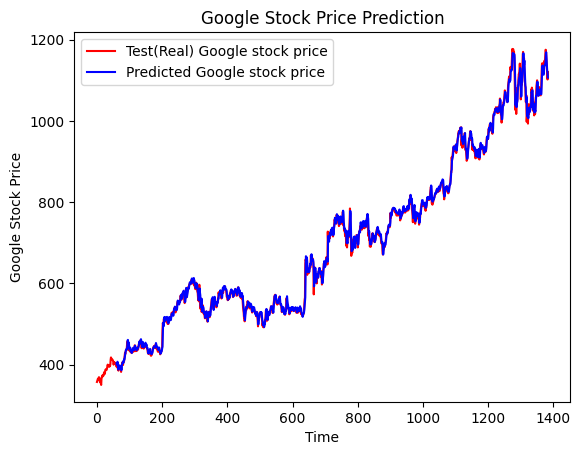

In [40]:
inputs = dataset_total.values
inputs = inputs.reshape(-1,1)
inputs_scaled=sc.transform(inputs)
X_test = []
y_test = []

for i in range(60,1384):
  X_test.append(inputs_scaled[i-60:i,0])
  y_test.append(inputs_scaled[i,0])

X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))


predicted_stock_price_scaled = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price_scaled)

print("Archana priya 212221230007")
plt.plot(np.arange(0,1384),inputs, color='red', label = 'Test(Real) Google stock price')
plt.plot(np.arange(60,1384),predicted_stock_price, color='blue', label = 'Predicted Google stock price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()



In [41]:
from sklearn.metrics import mean_squared_error as mse
mse = mse(y_test,predicted_stock_price)
print("Mean Squared Error = ",mse)


Mean Squared Error =  540916.0572932131
